# WeatherPy

# Conclusions


1. There does not appear to be any correlation between windspeed and the city's latitude. Windspeeds were equally scattered from  approximately 0-20 mph regardless of latitude. 
2. Cities with latitudes ranging from -40 to 20 all have similar temperatures today. Temperatures start to drop proportionately in cities with latitudes 20 to 80.  
3. Humidity does not appear to be correlated to latitude. Today's humidities are clustered from about 60-100% humidity, regardless of location, with fewer cities having humidities less than 60%

## Generate Cities List

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
from pprint import pprint
import time as time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [5]:
#only need to unhash if you need to run again, otherwise, it'll keep adding to the list
new_cities= []

for x in cities:
    y = x.replace(' ','+')
    new_cities.append(y)
new_cities

['ushuaia',
 'arraial+do+cabo',
 'pevek',
 'clyde+river',
 'acapulco',
 'barrow',
 'lucapa',
 'tual',
 'barentsburg',
 'tumannyy',
 'castro',
 'rikitea',
 'talnakh',
 'sisimiut',
 'bluff',
 'kampong+cham',
 'nhulunbuy',
 'margate',
 'bandarbeyla',
 'bredasdorp',
 'seagoville',
 'half+moon+bay',
 'komsomolskiy',
 'cidreira',
 'samarkand',
 'ponta+do+sol',
 'pskov',
 'hermanus',
 'mount+isa',
 'khatanga',
 'port+alfred',
 'kapaa',
 'new+norfolk',
 'georgetown',
 'jamestown',
 'ust-bolsheretsk',
 'mackenzie',
 'iqaluit',
 'grindavik',
 'pangnirtung',
 'qaanaaq',
 'gat',
 'dikson',
 'salalah',
 'kulhudhuffushi',
 'paulo+afonso',
 'samalaeulu',
 'esperance',
 'isangel',
 'victoria',
 'tura',
 'mataura',
 'saint-philippe',
 'hobart',
 'hithadhoo',
 'nanortalik',
 'hilo',
 'carnarvon',
 'humaita',
 'vaitupu',
 'tsihombe',
 'benguela',
 'punta+arenas',
 'tasiilaq',
 'coruripe',
 'severo-kurilsk',
 'sorland',
 'butaritari',
 'ladario',
 'saskylakh',
 'ambon',
 'chokurdakh',
 'atuona',
 'ishigak

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
Max_temp= []
Lat = []
Lon= []
Cloudiness = []
Humidity = []
Windspeed = []
Country = []

url = "http://api.openweathermap.org/data/2.5/weather?"
num = 0

for x in new_cities:
    city = x
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url).json()
          
    try:
        num = num + 1
        Max_temp.append(weather_response['main']['temp_max'])
        Lat.append(weather_response['coord']['lat'])
        Lon.append(weather_response['coord']['lon'])
        Cloudiness.append(weather_response['clouds']['all'])
        Humidity.append(weather_response['main']['humidity'])
        Windspeed.append(weather_response['wind']['speed'])
        Country.append(weather_response['sys']['country'])
        print(f"{num} | Processing {city}.")
        time.sleep(2)
        
    except (KeyError, IndexError):
        Max_temp.append('NaN')
        Lat.append('NaN')
        Lon.append('NaN')
        Cloudiness.append('NaN')
        Humidity.append('NaN')
        Windspeed.append('NaN')
        Country.append('NaN')
        print(f"{num} | Missing {city}, skipping.")
        time.sleep(2)

1 | Processing ushuaia.
2 | Processing arraial+do+cabo.
3 | Processing pevek.
4 | Processing clyde+river.
5 | Processing acapulco.
6 | Processing barrow.
7 | Processing lucapa.
8 | Processing tual.
9 | Missing barentsburg, skipping.
10 | Missing tumannyy, skipping.
11 | Processing castro.
12 | Processing rikitea.
13 | Processing talnakh.
14 | Processing sisimiut.
15 | Processing bluff.
16 | Processing kampong+cham.
17 | Processing nhulunbuy.
18 | Processing margate.
19 | Processing bandarbeyla.
20 | Processing bredasdorp.
21 | Processing seagoville.
22 | Processing half+moon+bay.
23 | Processing komsomolskiy.
24 | Processing cidreira.
25 | Processing samarkand.
26 | Processing ponta+do+sol.
27 | Processing pskov.
28 | Processing hermanus.
29 | Processing mount+isa.
30 | Processing khatanga.
31 | Processing port+alfred.
32 | Processing kapaa.
33 | Processing new+norfolk.
34 | Processing georgetown.
35 | Processing jamestown.
36 | Missing ust-bolsheretsk, skipping.
37 | Processing macken

297 | Processing chifeng.
298 | Processing luba.
299 | Processing novopskov.
300 | Processing fairbanks.
301 | Processing constitucion.
302 | Processing yuyao.
303 | Processing kysyl-syr.
304 | Missing bacuit, skipping.
305 | Processing dingle.
306 | Processing nortelandia.
307 | Processing poso.
308 | Processing yulara.
309 | Processing katwijk.
310 | Missing nizhneyansk, skipping.
311 | Processing cairns.
312 | Processing wenling.
313 | Processing consett.
314 | Processing petropavlovskaya.
315 | Processing callaguip.
316 | Processing camacari.
317 | Processing walvis+bay.
318 | Processing springdale.
319 | Missing camana, skipping.
320 | Processing neyvo-rudyanka.
321 | Processing fereydun+kenar.
322 | Processing muros.
323 | Processing ilhabela.
324 | Processing balabac.
325 | Processing hualmay.
326 | Processing presque+isle.
327 | Processing raudeberg.
328 | Processing santa+maria+do+suacui.
329 | Processing killarney.
330 | Processing kavaratti.
331 | Processing kalmunai.
332 | 

594 | Processing chincha+alta.
595 | Processing shangrao.
596 | Processing maceio.


In [8]:
#takes all [] and makes them into a {}
cities_dict= {}
cities_dict= {"Cities": cities,
    "Country": Country,
    "Max_temp": Max_temp,
    "Lat": Lat,
    "Lon": Lon,
    "Cloudiness": Cloudiness,
    "Humidity": Humidity,
    "Windspeed": Windspeed}

In [9]:
#turns dictionary into dataframe
cities_data = pd.DataFrame(cities_dict)

In [23]:
#saves dataframe to csv file
cities_data.to_csv(output_data_file)

In [44]:
cities_data.count()

Cities        596
Country       596
Max_temp      596
Lat           596
Lon           596
Cloudiness    596
Humidity      596
Windspeed     596
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

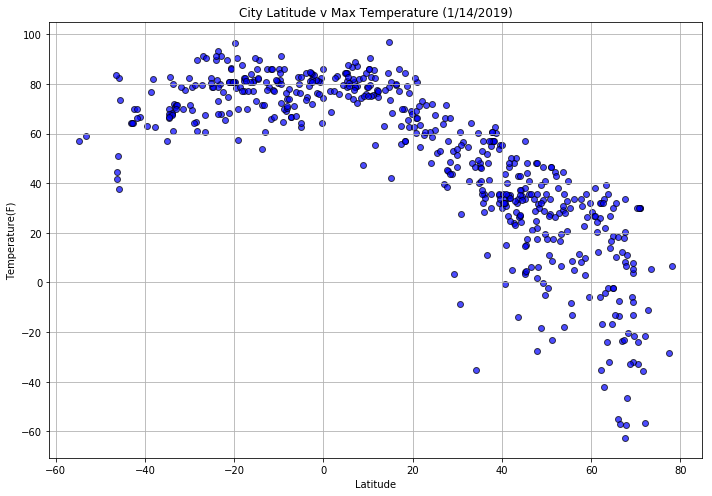

In [38]:
plt.figure(figsize=(10,7))

Lat = cities_data["Lat"]
Temp = cities_data["Max_temp"]
plt.scatter(Lat, Temp, marker="o", facecolors= 'blue', alpha = 0.7, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("City Latitude v Max Temperature (1/14/2019)")
plt.grid()

plt.tight_layout()
plt.savefig("output_data/Lat_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

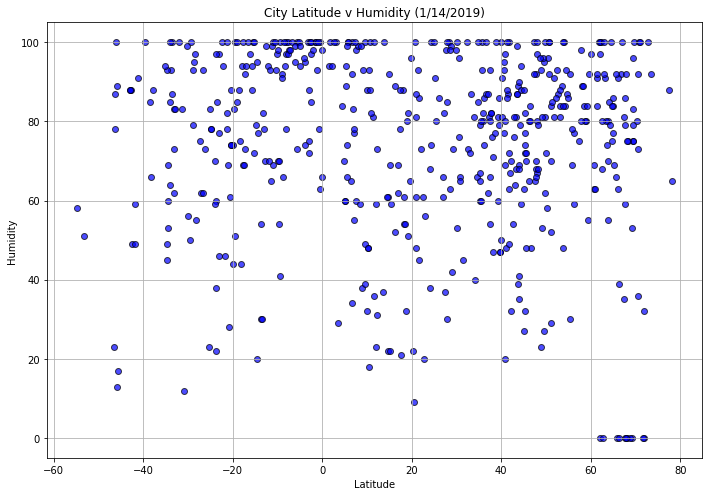

In [39]:
plt.figure(figsize=(10,7))

Humid = cities_data["Humidity"]
plt.scatter(Lat, Humid, marker="o", facecolors= 'blue', alpha = 0.7, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude v Humidity (1/14/2019)")
plt.grid()
plt.ylim(-5,105)

plt.tight_layout()
plt.savefig("output_data/Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

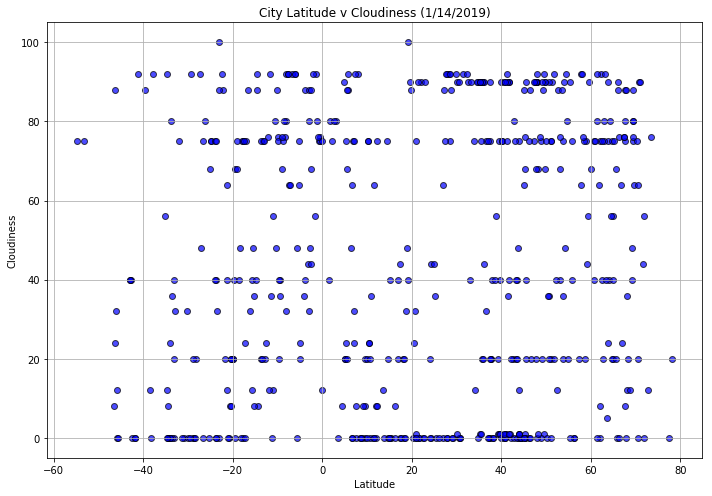

In [41]:
plt.figure(figsize=(10,7))

Clouds = cities_data["Cloudiness"]
plt.scatter(Lat, Clouds, marker="o", facecolors= 'blue', alpha = 0.7, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude v Cloudiness (1/14/2019)")
plt.grid()

plt.tight_layout()
plt.savefig("output_data/Lat_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

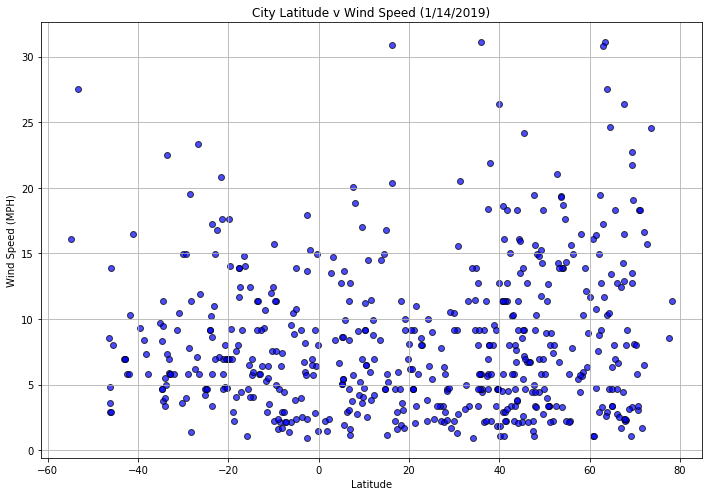

In [40]:
plt.figure(figsize=(10,7))

W_speed = cities_data["Windspeed"]
plt.scatter(Lat, W_speed, marker="o", facecolors= 'blue', alpha = 0.7, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude v Wind Speed (1/14/2019)")
plt.grid()

plt.tight_layout()
plt.savefig("output_data/Lat_Windspeed.png")
plt.show()